In [14]:
import numpy as np
import matplotlib.pyplot as plt
from DBSCAN import evaluate
import time

# Data

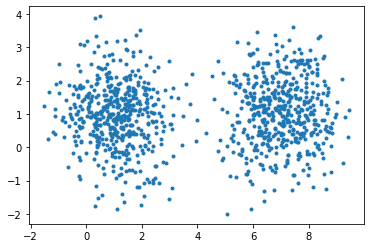

In [3]:
Npoints = 1000
n = int(Npoints/2)

x = np.random.normal(1,1,n)
y = np.random.normal(1,1,n)
labels_true = np.zeros(shape=(n,))
x = np.concatenate([x,np.random.normal(7,1,n)])
y = np.concatenate([y,np.random.normal(1,1,n)])
labels_true = np.concatenate([labels_true, np.ones(shape=(n,))])

plt.plot(x,y,'.')

X = []
for i in range(len(x)):
    X.append([x[i],y[i]])
X = np.array(X)

# DBSCAN

In [4]:
eps = 0.8
minPts = 20

# Scikit Benchmark

Estimated number of clusters: 2
Estimated number of noise points: 13
Homogeneity: 0.970
Completeness: 0.892
V-measure: 0.929
Adjusted Rand Index: 0.966
Adjusted Mutual Information: 0.929
Silhouette Coefficient: 0.567


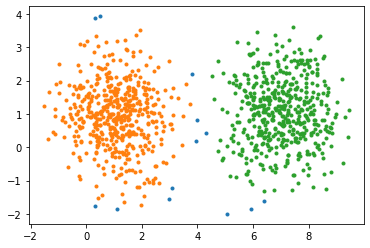

In [5]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=eps, min_samples=minPts).fit(X)
labels = clustering.labels_

evaluate(labels, labels_true, X, True)

# Our implementation

Estimated number of clusters: 2
Estimated number of noise points: 13
Homogeneity: 0.970
Completeness: 0.892
V-measure: 0.929
Adjusted Rand Index: 0.966
Adjusted Mutual Information: 0.929
Silhouette Coefficient: 0.567


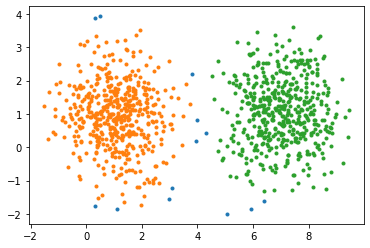

In [6]:
from DBSCAN import DBSCAN, numpyToPoints

Points = numpyToPoints(X)

clustering = DBSCAN(eps, minPts)
clustering.fit(Points)
labels = clustering.labels

evaluate(labels, labels_true, X, True)

# HDBSCAN

KeyboardInterrupt: 

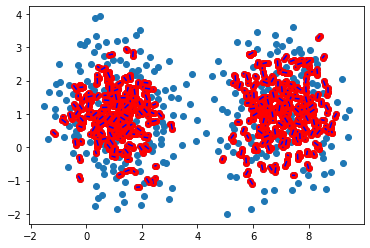

In [7]:
from DBSCAN import HDBSCAN

HDBSCAN(X, 1)

# Testy wydajnośći

In [19]:
NPoints = np.arange(10)*100+100
timeDBSACN = []

In [24]:
from DBSCAN import DBSCAN, numpyToPoints

for n in NPoints:
    Points = numpyToPoints(X[:n])

    clustering = DBSCAN(eps, minPts)
    st = time.time()
    clustering.fit(Points)
    et = time.time()
    timeDBSACN.append(et-st)

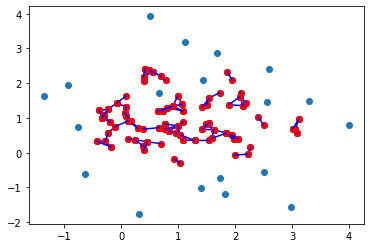

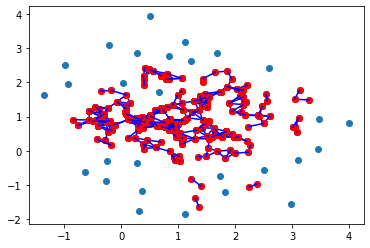

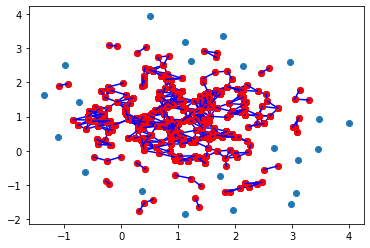

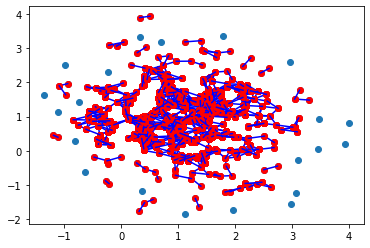

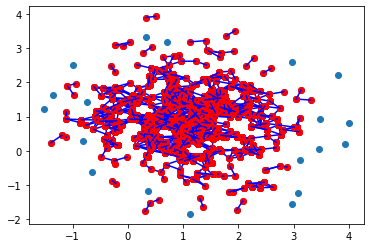

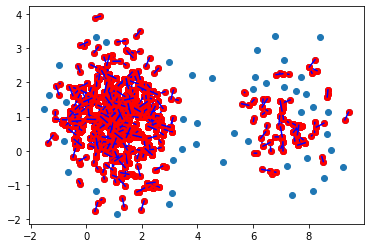

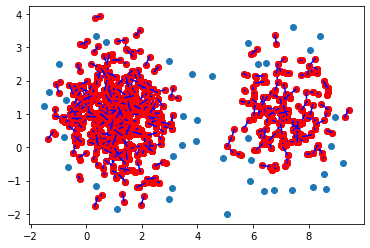

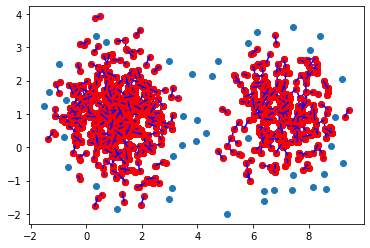

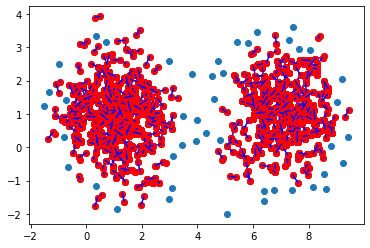

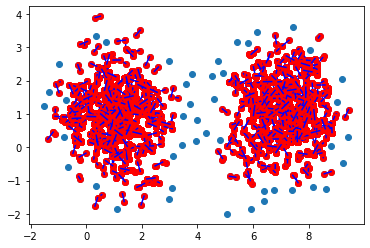

In [31]:
from DBSCAN import DBSCAN, numpyToPoints

timeHDBSACN = []
for n in NPoints:
    st = time.time()
    HDBSCAN(X[:n], 0.3)
    et = time.time()
    timeHDBSACN.append(et-st)

Text(0, 0.5, 'time [s]')

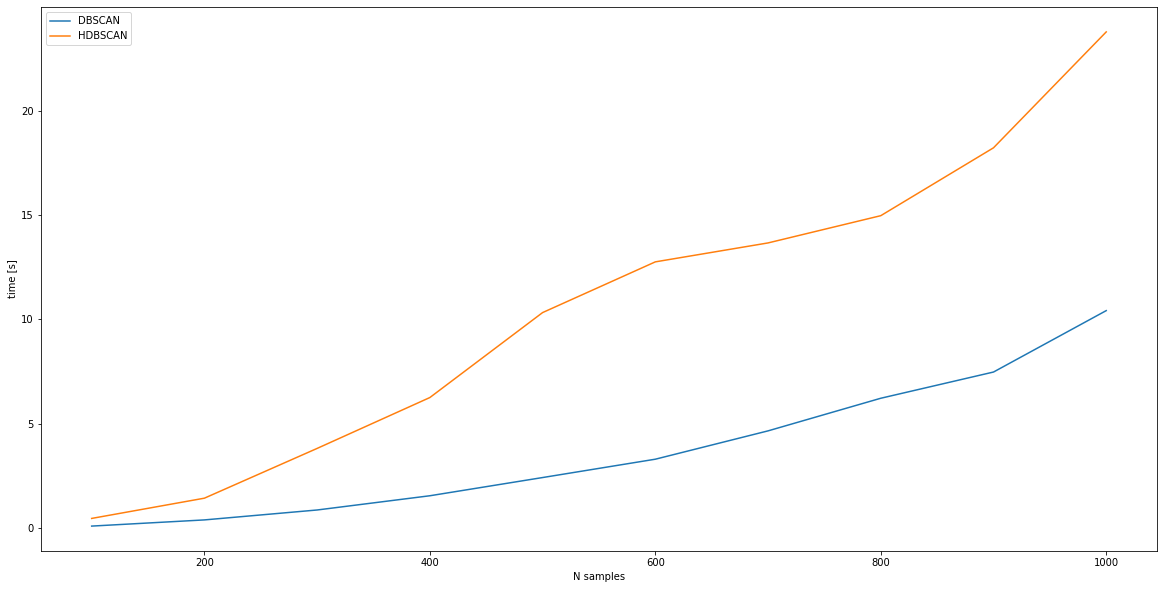

In [37]:
plt.figure(figsize=(20,10))
plt.plot(NPoints,timeDBSACN,NPoints,timeHDBSACN[:10])
plt.legend(['DBSCAN','HDBSCAN'])
plt.xlabel('N samples')
plt.ylabel('time [s]')